## Packages

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 197 kB 12.3 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 


In [ ]:
from fastai.vision.all import *

## Static Variables

In [ ]:
### Dataloader
BATCH_SIZE = 32
VAL_BATCH_SIZE = 64
VAL_PERCENTAGE = .3
RANDOM_SEED = 32
RESIZE = 224

### Model
MODEL = resnet50
EPOCH = 10
FREEZE_EPOCHS = 2

## Sample dataset load
print("Sample dataset: Good-Guys-Bad-Guys-Image classification dataset from Kaggle.")
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gpiosenka/good-guysbad-guys-image-data-set
!unzip ./good-guysbad-guys-image-data-set.zip -d Datasets
DATASET = Path("Datasets/train")


## Dataset Details

In [ ]:
def check_dataset_folder():
    for folder in DATASET.iterdir():
        if folder.is_dir():
            number_of_files = len(get_image_files(folder))
            print(f"\n\033[1m{folder} folder contains {number_of_files} files\033[0m")

In [ ]:
check_dataset_folder()


Datasets/train/unsavory folder contains 5610 files

Datasets/train/savory folder contains 5610 files


## Datablock & Model

### Datablock

In [ ]:
dls = DataBlock(
          blocks = (ImageBlock, CategoryBlock),
          get_items = get_image_files,
          get_y = parent_label,
          splitter = RandomSplitter(valid_pct= VAL_PERCENTAGE, seed = RANDOM_SEED),
          item_tfms = Resize(RESIZE)
).dataloaders(DATASET, bs=BATCH_SIZE, val_bs = VAL_BATCH_SIZE)


Training Dataset Sample


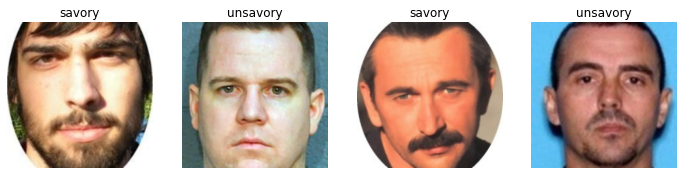

In [ ]:
print("Training Dataset Sample")
dls.train.show_batch(max_n = 4, nrows=1)

Validating Dataset Sample


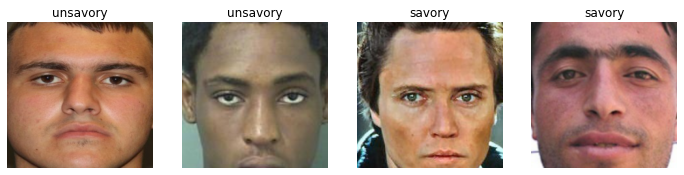

In [ ]:
print("Validating Dataset Sample")
dls.valid.show_batch(max_n = 4, nrows = 1)

### Model

In [ ]:
print("Model: RESNET50")
learn = vision_learner(dls, 
                       MODEL, 
                       metrics = [accuracy, error_rate], 
                       cbs = EarlyStoppingCallback(patience=4, min_delta=0.1,)
                       )

Model: RESNET50


## Training

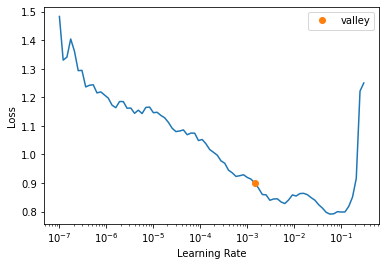

In [ ]:
## Learning rate finder

lr_value = learn.lr_find()

In [ ]:
## Training

learn.fine_tune(EPOCH, lr_value.valley, FREEZE_EPOCHS)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.437768,0.305920,0.896613,0.103387,02:52
1,0.280757,0.181253,0.929590,0.070410,02:52


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.152544,0.132547,0.953060,0.046940,03:41
1,0.124439,0.129467,0.952763,0.047237,03:40
2,0.105020,0.123116,0.961676,0.038324,03:41
3,0.072038,0.107628,0.963458,0.036542,03:41
4,0.052770,0.116483,0.960487,0.039513,03:41


No improvement since epoch 0: early stopping


## Testing

In [ ]:
scores = learn.validate()
print(f"\nValid Loss: {scores[0]},\nAccuracy: {scores[1]},\nError Rate: {scores[2]}")


Valid Loss: 0.11648327112197876,
Accuracy: 0.9604872465133667,
Error Rate: 0.03951277583837509


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

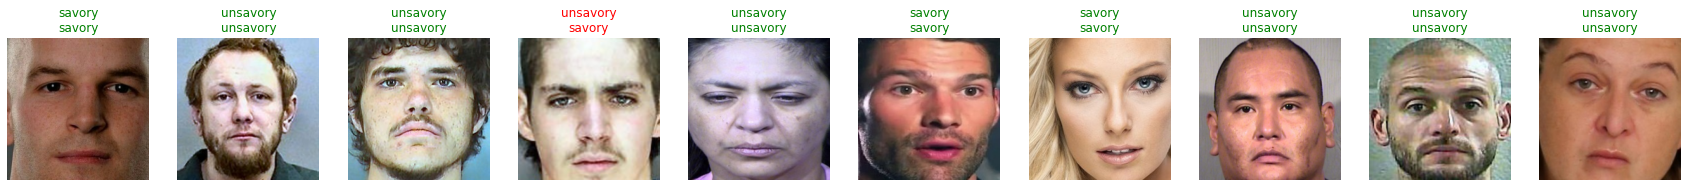

In [ ]:
learn.show_results(nrows=1, max_n=10)

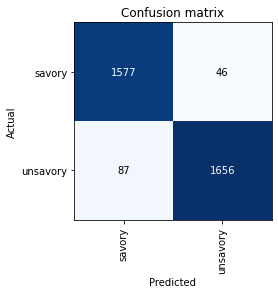

In [ ]:
interp.plot_confusion_matrix()

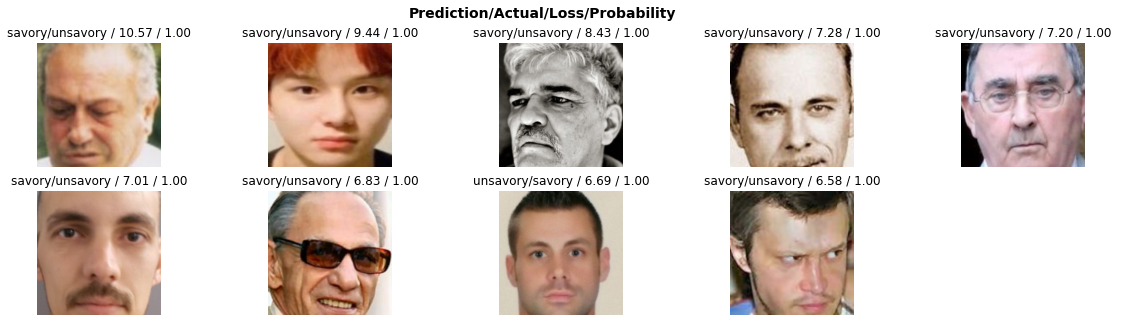

In [ ]:
interp.plot_top_losses(10, nrows = 2, figsize=(20, 5))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

      savory       0.95      0.97      0.96      1623
    unsavory       0.97      0.95      0.96      1743

    accuracy                           0.96      3366
   macro avg       0.96      0.96      0.96      3366
weighted avg       0.96      0.96      0.96      3366



## Save Model

In [ ]:
MODEL_PATH = Path("Models")

MODEL_PATH.mkdir(exist_ok=True)

In [ ]:
learn.export(MODEL_PATH/f'model-{datetime.now()}.pkl')
print("Model Saved...")

Model Saved...
